### 匯入資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
#忽略警示訊息
import warnings
warnings.filterwarnings('ignore')

data_path = '/Users/amber21_chang/Work/ML100Days/Day051-053/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

### 探索性資料分析

In [2]:
#查看train資料資料集
df_train
##有113個樣本, 22個特徵
##發現有許多NA值

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,NaN,356071.0,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,NaN,NaN,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,NaN,NaN,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,NaN,NaN,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0


In [3]:
#查看train資料集的基本資訊
df_train.info()
##可看出各欄位的型態
##name, email_address為物件型態
##poi為布林值
##其餘皆為數值型態
##可看出哪些欄位有NA值
##除了name與boi欄位, 其餘欄位都有NA值

##有關財務的特徵
##1   bonus                     獎金  
##2   deferral_payments         延期付款    
##3   deferred_income           遞延收入 
##4   director_fees             董事費 
##6   exercised_stock_options   已行使的股票選擇權 
##7   expenses                  花費
##11  loan_advances             高額貸款  
##12  long_term_incentive       長期獎勵 
##13  other                      
##14  poi                       是否為嫌疑人(person of interest)   
##15  restricted_stock          限制性股票
##16  restricted_stock_deferred 限制性股票(延遲) 
##17  salary                    薪水 
##20  total_payments            總付款  
##21  total_stock_value         總股票價值  

##有關email的特徵
##除了 email_address，其餘皆為次數
##5   email_address             
##8   from_messages              
##9   from_poi_to_this_person    
##10  from_this_person_to_poi    
##19  to_messages               
##18  shared_receipt_with_poi    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

In [4]:
#查看train資料集的進階資訊
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [5]:
#查看test資料資料集
df_test
##有33個樣本, 21個特徵

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0
5,HICKERSON GARY J,1700000.0,NaN,NaN,NaN,gary.hickerson@enron.com,NaN,98849.0,27.0,40.0,...,NaN,69223.0,1936.0,441096.0,NaN,211788.0,900.0,1320.0,2081796.0,441096.0
6,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,...,2000000.0,1617011.0,7427621.0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
7,CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
8,DONAHUE JR JEFFREY M,800000.0,NaN,-300000.0,NaN,jeff.donahue@enron.com,765920.0,96268.0,22.0,188.0,...,NaN,NaN,891.0,315068.0,NaN,278601.0,772.0,865.0,875760.0,1080988.0
9,REYNOLDS LAWRENCE,100000.0,51365.0,-200000.0,NaN,NaN,4160672.0,8409.0,NaN,NaN,...,NaN,156250.0,202052.0,201483.0,-140264.0,76399.0,NaN,NaN,394475.0,4221891.0


In [6]:
#查看test資料集的基本資訊
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 21 columns):
name                         33 non-null object
bonus                        21 non-null float64
deferral_payments            11 non-null float64
deferred_income              15 non-null float64
director_fees                4 non-null float64
email_address                28 non-null object
exercised_stock_options      21 non-null float64
expenses                     22 non-null float64
from_messages                21 non-null float64
from_poi_to_this_person      21 non-null float64
from_this_person_to_poi      21 non-null float64
loan_advances                2 non-null float64
long_term_incentive          17 non-null float64
other                        24 non-null float64
restricted_stock             28 non-null float64
restricted_stock_deferred    8 non-null float64
salary                       22 non-null float64
shared_receipt_with_poi      21 non-null float64
to_messages         

In [7]:
#查看test資料集的進階資訊
df_test.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,2.100000e+01,1.100000e+01,1.500000e+01,4.000000e+00,2.100000e+01,2.200000e+01,21.000000,21.000000,21.000000,2.000000e+00,1.700000e+01,2.400000e+01,2.800000e+01,8.000000e+00,2.200000e+01,21.000000,21.000000,2.900000e+01,2.800000e+01
mean,5.937791e+06,4.209095e+06,-2.677068e+06,4.183778e+05,1.756609e+07,3.001494e+05,291.428571,65.190476,44.761905,4.296250e+07,3.423860e+06,2.275742e+06,5.329051e+06,6.517809e+05,1.518799e+06,1377.952381,1819.428571,1.332610e+07,1.813783e+07
std,2.097902e+07,9.442610e+06,7.096873e+06,6.547074e+05,6.746116e+07,1.102936e+06,702.655433,71.752783,131.353685,5.792972e+07,1.163191e+07,8.737002e+06,2.452196e+07,6.506284e+06,5.628470e+06,1222.687306,1720.856693,5.718233e+07,8.166322e+07
min,1.000000e+05,5.136500e+04,-2.799289e+07,3.834600e+04,7.659200e+05,2.151000e+03,12.000000,0.000000,0.000000,2.000000e+06,6.922300e+04,6.900000e+01,-2.604490e+06,-7.576788e+06,7.639900e+04,3.000000,58.000000,2.151000e+03,4.730400e+04
25%,4.250000e+05,2.322650e+05,-1.809217e+06,8.367450e+04,1.030329e+06,3.428375e+04,25.000000,28.000000,1.000000,2.248125e+07,3.500000e+05,1.651000e+03,2.087342e+05,-6.831460e+05,2.196135e+05,702.000000,807.000000,5.643480e+05,9.853660e+05
50%,1.000000e+06,5.643480e+05,-2.350000e+05,1.183240e+05,2.027865e+06,6.181700e+04,29.000000,40.000000,12.000000,4.296250e+07,4.619120e+05,7.460700e+04,4.235475e+05,-2.237825e+05,2.728470e+05,1074.000000,1607.000000,1.061827e+06,1.838142e+06
75%,2.000000e+06,2.637936e+06,-1.292880e+05,4.530272e+05,4.160672e+06,9.618200e+04,75.000000,64.000000,21.000000,6.344375e+07,9.742930e+05,3.312915e+05,1.300855e+06,-7.020150e+04,3.692830e+05,1604.000000,2350.000000,3.676340e+06,3.250302e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,3069.000000,242.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,7991.000000,3.098866e+08,4.345095e+08


In [8]:
#合併資料集
train_Y = df_train['poi']
train_dp = df_train.drop(['name', 'poi'] , axis=1)
test_dp = df_test.drop(['name'] , axis=1)
df = pd.concat([train_dp, test_dp])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [9]:
train_Y

0       True
1       True
2       True
3       True
4       True
       ...  
108    False
109    False
110    False
111    False
112    False
Name: poi, Length: 113, dtype: bool

### 資料前處理-NA值處理

In [10]:
#NA值處理(Day012)
def na_check(df_data):
    #計算各欄位NA值比例
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    #???data_na.drop(data_na[data_na == 0].index)
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    #將有NA值的特徵欄位與NA值比例組成新的DataFrame
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


In [11]:
#把有8成以上NA的特徵欄位直接捨棄
df = df.drop(['loan_advances', 'director_fees', 'restricted_stock_deferred'], axis=1)
#將object型態的email_address欄位捨去
df = df.drop(['email_address'], axis=1)

In [12]:
#另存數值型特徵
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

16 Numeric Features : ['bonus', 'deferral_payments', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']



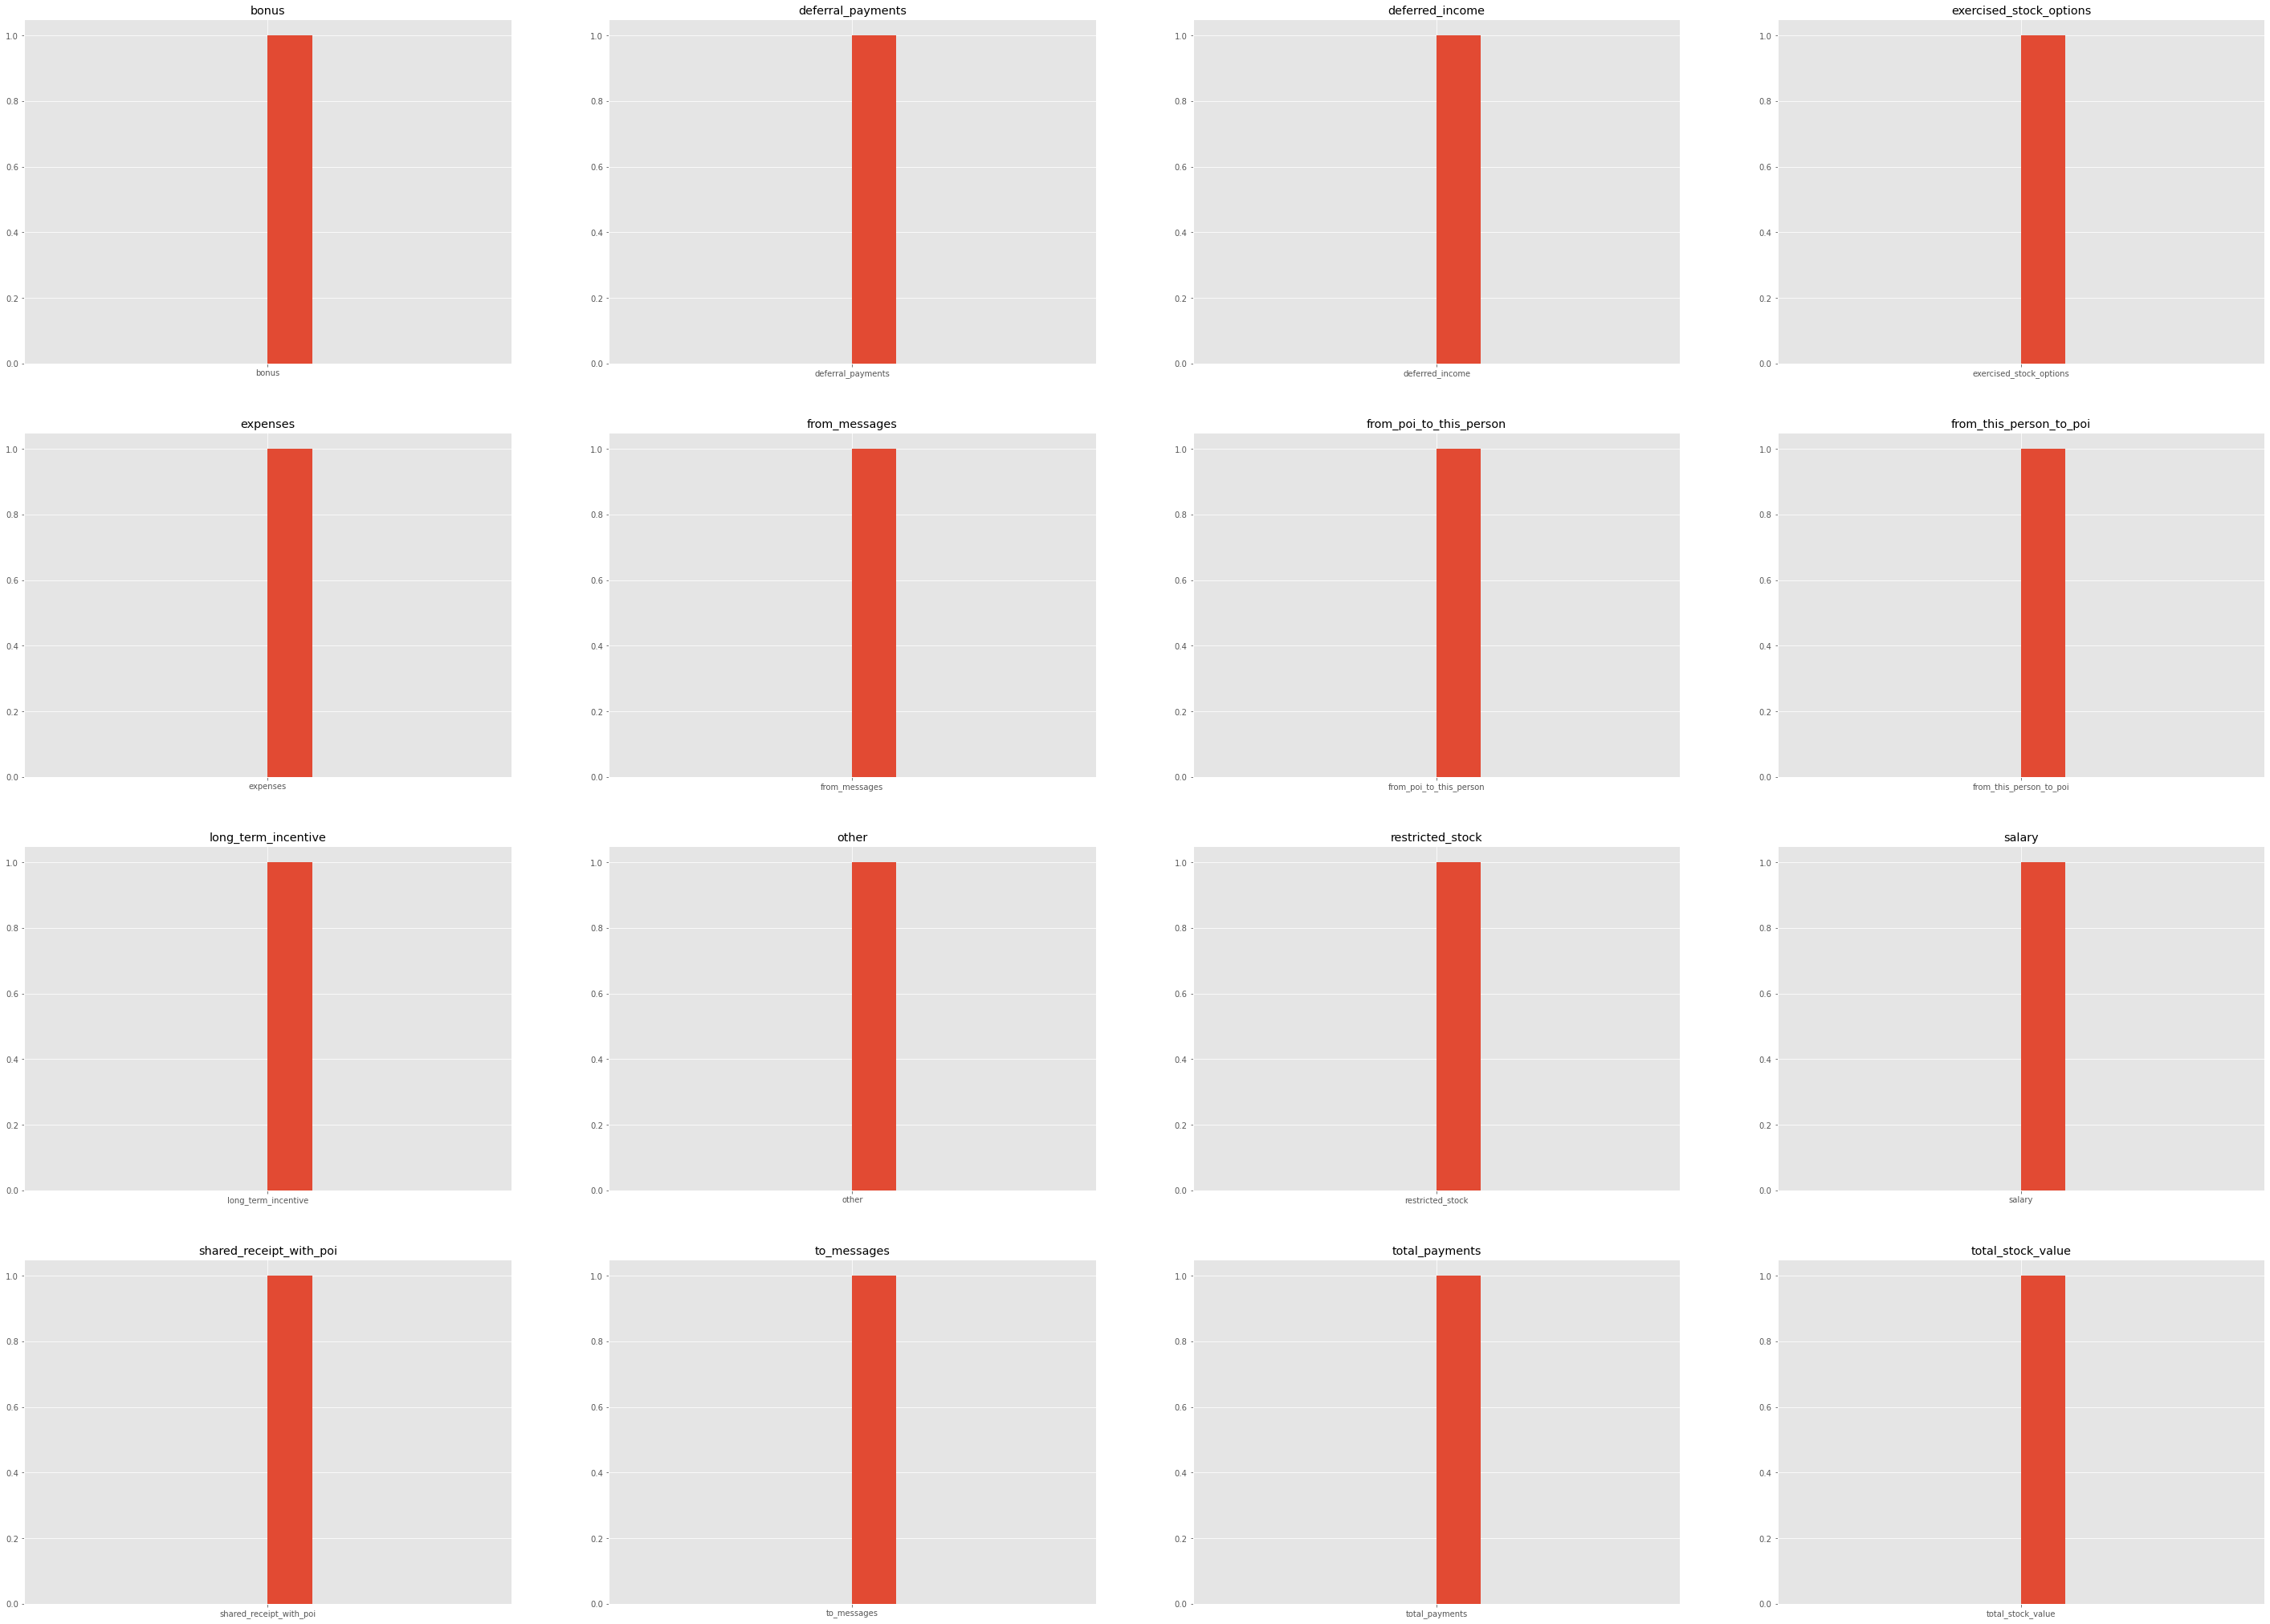

In [13]:
#類別欄位取眾數, 偏態不明顯取平均, 偏態明顯取中位數
import matplotlib.pyplot as plt
nrows = len(num_features)
ncols = nrows // 4
plt.figure(figsize=(50, 150))
for i in range(len(num_features)):
    plt.subplot(nrows, ncols, i+1)
    plt.hist(num_features[i])
    plt.title(str(num_features[i]))
plt.show()
##看不出偏態情形

In [14]:
# #查看偏態
# plt.hist(df['deferral_payments'])

In [15]:
# #查看補值前的狀態
# df['deferral_payments']

In [16]:
# #偏態明顯, 將deferral_payments欄位的NA值以中位數填補
# df['deferral_payments'] = df['deferral_payments'].fillna(df['deferral_payments'].median())

In [17]:
# #確認NA值有被取代
# df['deferral_payments']

In [18]:
# #查看偏態
# plt.hist(df['deferred_income'])

In [19]:
# #查看補值前的狀態
# df['deferred_income']

In [20]:
# #偏態明顯, 將deferral_income欄位的NA值以中位數填補
# df['deferred_income'] = df['deferred_income'].fillna(df['deferred_income'].median())

In [21]:
# #確認NA值有被取代
# df['deferred_income']

In [22]:
# #查看偏態
# plt.hist(df['long_term_incentive'])

In [23]:
# #查看補值前的狀態
# df['long_term_incentive']

In [24]:
# #偏態明顯, 將long_term_incentive欄位的NA值以中位數填補
# df['long_term_incentive'] = df['long_term_incentive'].fillna(df['long_term_incentive'].median())

In [25]:
# #確認NA值有被取代
# df['long_term_incentive']

In [26]:
# #查看偏態
# plt.hist(df['bonus'])

In [27]:
# #查看補值前的狀態
# df['bonus']

In [28]:
# #偏態明顯, 將bonus欄位的NA值以中位數填補
# df['bonus'] = df['bonus'].fillna(df['bonus'].median())

In [29]:
# #確認NA值有被取代
# df['bonus']

In [30]:
# #查看偏態
# plt.hist(df['from_messages'])

In [31]:
# #查看補值前的狀態
# df['from_messages']

In [32]:
# #偏態明顯, 將from_messages欄位的NA值以中位數填補
# df['from_messages'] = df['from_messages'].fillna(df['from_messages'].median())

In [33]:
# #確認NA值有被取代
# df['from_messages']

In [34]:
# #查看偏態
# plt.hist(df['from_poi_to_this_person'])

In [35]:
# #查看補值前的狀態
# df['from_poi_to_this_person']

In [36]:
# #偏態明顯, 將from_poi_to_this_person欄位的NA值以中位數填補
# df['from_poi_to_this_person'] = df['from_poi_to_this_person'].fillna(df['from_poi_to_this_person'].median())

In [37]:
# #確認NA值有被取代
# df['from_poi_to_this_person']

In [38]:
# #查看偏態
# plt.hist(df['from_this_person_to_poi'])

In [39]:
# #查看補值前的狀態
# df['from_this_person_to_poi']

In [40]:
# #偏態明顯, 將from_this_person_to_poi欄位的NA值以中位數填補
# df['from_this_person_to_poi'] = df['from_this_person_to_poi'].fillna(df['from_this_person_to_poi'].median())

In [41]:
# #確認NA值有被取代
# df['from_this_person_to_poi']

In [42]:
# #查看偏態
# plt.hist(df['shared_receipt_with_poi'])

In [43]:
# #查看補值前的狀態
# df['shared_receipt_with_poi']

In [44]:
# #偏態明顯, 將shared_receipt_with_poi欄位的NA值以中位數填補
# df['shared_receipt_with_poi'] = df['shared_receipt_with_poi'].fillna(df['shared_receipt_with_poi'].median())

In [45]:
# #確認NA值有被取代
# df['shared_receipt_with_poi']

In [46]:
# #查看偏態
# plt.hist(df['to_messages'])

In [47]:
# #查看補值前的狀態
# df['to_messages']

In [48]:
# #偏態明顯, 將to_messages欄位的NA值以中位數填補
# df['to_messages'] = df['to_messages'].fillna(df['to_messages'].median())

In [49]:
# #確認NA值有被取代
# df['to_messages']

In [50]:
# #查看偏態
# plt.hist(df['other'])

In [51]:
# #查看補值前的狀態
# df['other']

In [52]:
# #偏態明顯, 將other欄位的NA值以中位數填補
# df['other'] = df['other'].fillna(df['other'].median())

In [53]:
# #確認NA值有被取代
# df['other']

In [54]:
# #查看偏態
# plt.hist(df['expenses'])

In [55]:
# #查看補值前的狀態
# df['expenses']

In [56]:
# #偏態明顯, 將expenses欄位的NA值以中位數填補
# df['expenses'] = df['expenses'].fillna(df['expenses'].median())

In [57]:
# #確認NA值有被取代
# df['expenses']

In [58]:
# #查看偏態
# plt.hist(df['salary'])

In [59]:
# #查看補值前的狀態
# df['salary']

In [60]:
# #偏態明顯, 將salary欄位的NA值以中位數填補
# df['salary'] = df['salary'].fillna(df['salary'].median())

In [61]:
# #確認NA值有被取代
# df['salary']

In [62]:
# #查看偏態
# plt.hist(df['exercised_stock_options'])

In [63]:
# #查看補值前的狀態
# df['exercised_stock_options']

In [64]:
# #偏態明顯, 將exercised_stock_options欄位的NA值以中位數填補
# df['exercised_stock_options'] = df['exercised_stock_options'].fillna(df['exercised_stock_options'].median())

In [65]:
# #確認NA值有被取代
# df['exercised_stock_options']

In [66]:
# #查看偏態
# plt.hist(df['restricted_stock'])

In [67]:
# #查看補值前的狀態
# df['restricted_stock']

In [68]:
# #偏態明顯, 將restricted_stock欄位的NA值以中位數填補
# df['restricted_stock'] = df['restricted_stock'].fillna(df['restricted_stock'].median())

In [69]:
# #確認NA值有被取代
# df['restricted_stock']

In [70]:
# #查看偏態
# plt.hist(df['total_payments'])

In [71]:
# #查看補值前的狀態
# df['total_payments']

In [72]:
# #偏態明顯, 將total_payments欄位的NA值以中位數填補
# df['total_payments'] = df['total_payments'].fillna(df['total_payments'].median())

In [73]:
# #確認NA值有被取代
# df['total_payments']

In [74]:
# #查看偏態
# plt.hist(df['total_stock_value'])

In [75]:
# #查看補值前的狀態
# df['total_stock_value']

In [76]:
# #偏態明顯, 將salary欄位的NA值以中位數填補
# df['total_stock_value'] = df['total_stock_value'].fillna(df['total_stock_value'].median())

In [77]:
# #確認NA值有被取代
# df['total_stock_value']

In [78]:
from sklearn.impute import SimpleImputer
#看完各欄位, 發先都有明顯偏態, 所以將NA值以中位數填補
imputer = SimpleImputer(strategy = 'median')
#填補器載入各欄位中位數
imputer.fit(df)

SimpleImputer(strategy='median')

In [79]:
#確認NA值比例
na_check(df)

,Missing Ratio
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
to_messages,41.095890
shared_receipt_with_poi,41.095890
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890
other,36.301370


In [80]:
#將中位數回填df資料中的NA值
df = imputer.transform(df)

In [81]:
#df變成array
type(df)

numpy.ndarray

In [82]:
#再轉成dataframe
df = pd.DataFrame(df)

In [83]:
#再度查看有無NA值
na_check(df)

,Missing Ratio


In [84]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1750000.0,227449.0,-3504386.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,227449.0,-159792.0,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,227449.0,-4167.0,1624396.0,22884.0,39.0,13.0,14.0,442035.0,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,227449.0,-159792.0,1310813.5,118134.0,41.0,35.0,8.0,602671.0,907502.0,985032.0,224305.0,740.5,1211.0,2652612.0,985032.0
4,1250000.0,227449.0,-262500.0,1310813.5,35818.0,144.0,199.0,25.0,375304.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1000000.0,227449.0,-159792.0,1465734.0,38559.0,40.0,23.0,8.0,369721.0,425688.0,378082.0,213625.0,1336.0,1607.0,2047593.0,1843816.0
142,1500000.0,227449.0,-159792.0,1835558.0,46950.0,92.0,28.0,23.0,554422.0,1852186.0,1293424.0,428780.0,2103.0,3187.0,4335388.0,3128982.0
143,769375.0,504610.0,-159792.0,2218275.0,46950.0,12.0,0.0,0.0,461912.0,52382.0,451740.0,259996.0,23.0,169.0,966522.0,2218275.0
144,200000.0,204075.0,-159792.0,2549361.0,57727.0,41.0,35.0,8.0,175000.0,2630.0,514847.0,236457.0,740.5,1211.0,875889.0,3064208.0


### 資料前處理-離群值處理

In [85]:
#離群值處理(Day009-011)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

std = StandardScaler()
x_std = std.fit_transform(df)
mms = MinMaxScaler()
x_mms = mms.fit_transform(df)
norm = Normalizer()
x_norm = norm.fit_transform(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x119959410>,
 'caps': [<matplotlib.lines.Line2D at 0x119959e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x119964e10>,
 'medians': [<matplotlib.lines.Line2D at 0x119a3d990>,
 'fliers': [<matplotlib.lines.Line2D at 0x119a3ded0>,
 'means': []}

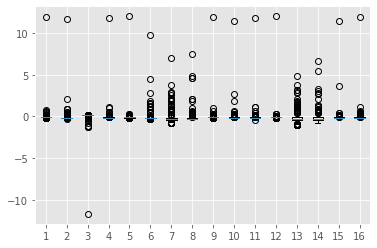

In [86]:
plt.boxplot(x_std)
##每個欄位都有離群值, 但6, 7, 8, 10, 13, 14偏態明顯

{'whiskers': [<matplotlib.lines.Line2D at 0x1198e00d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1198e0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1198e4b10>,
 'medians': [<matplotlib.lines.Line2D at 0x1198cd650>,
 'fliers': [<matplotlib.lines.Line2D at 0x1198cdb90>,
 'means': []}

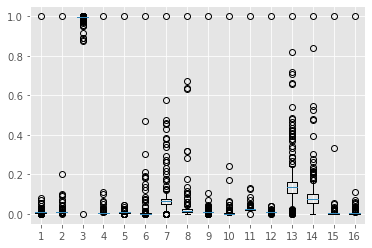

In [87]:
plt.boxplot(x_mms)
##每個欄位都有離群值, 但6, 7, 8, 13, 14偏態明顯

{'whiskers': [<matplotlib.lines.Line2D at 0x11a45c0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11a45cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11a454b10>,
 'medians': [<matplotlib.lines.Line2D at 0x11a464650>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a464b90>,
 'means': []}

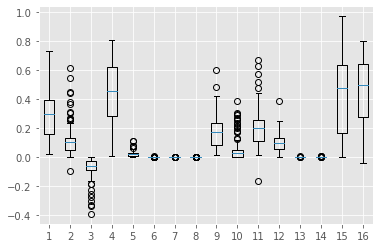

In [88]:
plt.boxplot(x_norm)
##每個欄位都有離群值, 但2, 3, 5, 10偏態明顯

In [89]:
print(type(x_std))
print(type(x_mms))
print(type(x_norm))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [90]:
x_std = pd.DataFrame(x_std)
print(type(x_std))

<class 'pandas.core.frame.DataFrame'>


In [91]:
x_mms = pd.DataFrame(x_mms)
print(type(x_mms))

<class 'pandas.core.frame.DataFrame'>


In [92]:
x_norm = pd.DataFrame(x_norm)
print(type(x_norm))

<class 'pandas.core.frame.DataFrame'>


### 資料前處理-資料轉換

In [93]:
#資料轉換(Day022-027)
#train_Y原先為True/False, 做label encoding轉為0/1
from sklearn.preprocessing import LabelEncoder
train_Y = LabelEncoder().fit_transform(train_Y)

In [94]:
train_Y
##與最初train_Y對比可知, 1是True, 0為False

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

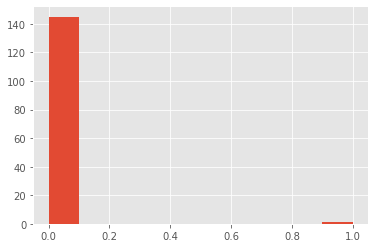

In [95]:
#boxcox轉換
import copy
from scipy import stats
x_mms_fixed = copy.deepcopy(x_mms)
plt.hist(x_mms_fixed[0])
##原本想做boxcox轉換, 但每個特徵偏態都很明顯, 不確定是否適合做boxcox轉換

(array([[14.,  1.,  0., ...,  0.,  1.,  0.],
        [12.,  1.,  1., ...,  0.,  0.,  1.],
        [15.,  0.,  0., ...,  0.,  0.,  1.],
        ...,
        [15.,  0.,  0., ...,  0.,  0.,  1.],
        [14.,  1.,  0., ...,  0.,  0.,  1.],
        [12.,  2.,  0., ...,  0.,  0.,  1.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 146 Lists of Patches objects>)

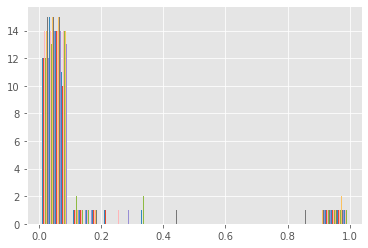

In [96]:
plt.hist(x_mms_fixed)

### 直接建模

In [97]:
train_num = train_Y.shape[0]
x_train = df[:train_num]

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, train_Y, test_size=0.2)

#### DecisionTree

In [99]:
#建模
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
#訓練模型
dtc.fit(x_train, y_train)
#預測測試集
y_pred1 = dtc.predict(x_test)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, y_pred1) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)
##Accuracy:  0.8260869565217391
##AUC:  0.6785714285714286

Accuracy:  0.8695652173913043
AUC:  0.7023809523809524


#### RandomForest

In [100]:
##RandomForestClassifier()
#建模
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=3)
#訓練模型
rfc.fit(x_train, y_train)
#預測測試集
y_pred2 = rfc.predict(x_test)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, y_pred2) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)
##Accuracy:  0.9130434782608695
##AUC:  0.726190476190476

Accuracy:  0.9565217391304348
AUC:  0.75


In [101]:
x_test_pred = df[train_num:]

In [102]:
#預測test資料集
y_pred_rfc = rfc.predict_proba(x_test_pred)
#將y_pred由array轉為Dataframe
y_pred_rfc = pd.DataFrame(y_pred_rfc)

In [103]:
#彙整y_pred_pd結果
import numpy as np
y_pred_rfc.columns = ['Not poi','poi']
y_pred_rfc['Name'] = df_test['name']
y_pred_rfc = y_pred_rfc[['Name', 'poi']]
print(y_pred_rfc)

                    Name   poi
0       BELDEN TIMOTHY N  0.28
1     BOWEN JR RAYMOND M  0.50
2         HANNON KEVIN P  0.37
3       DELAINEY DAVID W  0.18
4       CAUSEY RICHARD A  0.39
5       HICKERSON GARY J  0.43
6         FREVERT MARK A  0.57
7            CHAN RONNIE  0.02
8   DONAHUE JR JEFFREY M  0.15
9      REYNOLDS LAWRENCE  0.14
10      HORTON STANLEY C  0.13
11         LEWIS RICHARD  0.00
12    SHERRICK JEFFREY B  0.07
13        MEYER JEROME J  0.00
14   DERRICK JR. JAMES V  0.22
15              PIRO JIM  0.01
16   DETMERING TIMOTHY J  0.04
17     KISHKILL JOSEPH G  0.44
18        BAY FRANKLIN R  0.22
19        PRENTICE JAMES  0.00
20                 TOTAL  0.78
21        FALLON JAMES B  0.58
22            METTS MARK  0.04
23         WODRASKA JOHN  0.00
24   MORDAUNT KRISTINA M  0.00
25      CARTER REBECCA C  0.15
26      BHATNAGAR SANJAY  0.02
27      WALTERS GARETH W  0.07
28       BIBI PHILIPPE A  0.20
29       SHERRIFF JOHN R  0.37
30          GIBBS DANA R  0.05
31      

In [104]:
#y_pred_rfc.to_csv('Midterm_RandomForest.csv', index=False)

#### GradientBoosting

In [105]:
##GradientBoostingClassifier()
#建模
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=5)
#訓練模型
gbc.fit(x_train, y_train)
#預測測試集
y_pred3 = gbc.predict(x_test)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred3)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test, y_pred3) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)
##Accuracy:  0.8260869565217391
##AUC:  0.6785714285714286

Accuracy:  0.9130434782608695
AUC:  0.726190476190476


### 標準化後建模

### STD

In [106]:
train_num = train_Y.shape[0]
x_train_std = x_std[:train_num]

In [107]:
from sklearn.model_selection import train_test_split
x_train_std, x_test_std, y_train_std, y_test_std = train_test_split(x_train_std, train_Y, test_size=0.2)

#### STD+DecisionTree

In [108]:
#建模
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2)
#訓練模型
dtc.fit(x_train_std, y_train_std)
#預測測試集
y_pred4 = dtc.predict(x_test_std)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_std, y_pred4)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_std, y_pred4) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)

Accuracy:  0.8260869565217391
AUC:  0.6166666666666667


#### STD+RandomForest

In [109]:
##RandomForestClassifier()
#建模
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=4)
#訓練模型
rfc.fit(x_train_std, y_train_std)
#預測測試集
y_pred5 = rfc.predict(x_test_std)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_std, y_pred5)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_std, y_pred5) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)
##Accuracy:  0.8260869565217391
##AUC:  0.4523809523809524

Accuracy:  0.9130434782608695
AUC:  0.6666666666666666


In [110]:
x_test_pred = df[train_num:]

In [111]:
#將test資料集做StandardScaler轉換
test_std = std.fit_transform(x_test_pred)
#預測test資料集
y_pred_std_rfc = rfc.predict_proba(test_std)
#將y_pred由array轉為Dataframe
y_pred_std_rfc = pd.DataFrame(y_pred_std_rfc)

In [112]:
#彙整y_pred_pd結果
import numpy as np
y_pred_std_rfc.columns = ['Not poi','poi']
y_pred_std_rfc['Name'] = df_test['name']
y_pred_std_rfc = y_pred_std_rfc[['Name', 'poi']]
print(y_pred_std_rfc)

                    Name   poi
0       BELDEN TIMOTHY N  0.35
1     BOWEN JR RAYMOND M  0.38
2         HANNON KEVIN P  0.30
3       DELAINEY DAVID W  0.46
4       CAUSEY RICHARD A  0.46
5       HICKERSON GARY J  0.41
6         FREVERT MARK A  0.39
7            CHAN RONNIE  0.32
8   DONAHUE JR JEFFREY M  0.40
9      REYNOLDS LAWRENCE  0.45
10      HORTON STANLEY C  0.30
11         LEWIS RICHARD  0.32
12    SHERRICK JEFFREY B  0.32
13        MEYER JEROME J  0.32
14   DERRICK JR. JAMES V  0.27
15              PIRO JIM  0.32
16   DETMERING TIMOTHY J  0.11
17     KISHKILL JOSEPH G  0.25
18        BAY FRANKLIN R  0.24
19        PRENTICE JAMES  0.26
20                 TOTAL  0.85
21        FALLON JAMES B  0.42
22            METTS MARK  0.30
23         WODRASKA JOHN  0.32
24   MORDAUNT KRISTINA M  0.32
25      CARTER REBECCA C  0.41
26      BHATNAGAR SANJAY  0.31
27      WALTERS GARETH W  0.32
28       BIBI PHILIPPE A  0.43
29       SHERRIFF JOHN R  0.40
30          GIBBS DANA R  0.28
31      

In [113]:
#y_pred_std_rfc.to_csv('Midterm_stdRandomForest.csv', index=False)

#### STD+GradientBoosting

In [114]:
##GradientBoostingClassifier()
#建模
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=6)
#訓練模型
gbc.fit(x_train_std, y_train_std)
#預測測試集
y_pred6 = gbc.predict(x_test_std)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_std, y_pred6)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_std, y_pred6) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc)
##Accuracy:  0.782608695652174
##AUC:  0.4285714285714286

Accuracy:  0.9130434782608695
AUC:  0.6666666666666666


### MMS

In [115]:
train_num = train_Y.shape[0]
x_train_mms = x_mms[:train_num]

In [116]:
from sklearn.model_selection import train_test_split
x_train_mms, x_test_mms, y_train_mms, y_test_mms = train_test_split(x_train_mms, train_Y, test_size=0.2)

#### MMS+DecisionTree

In [117]:
#建模
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=7)
#訓練模型
dtc.fit(x_train_mms, y_train_mms)
#預測測試集
y_pred7 = dtc.predict(x_test_mms)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_mms, y_pred7)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_mms, y_pred7) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

Accuracy:  0.782608695652174
AUC:  0.5916666666666667


In [118]:
x_test_pred = df[train_num:]

In [119]:
#將test資料集做MinMaxScaler轉換
test_mms = mms.fit_transform(x_test_pred)
#預測test資料集
y_pred_mms_dtc = rfc.predict_proba(test_mms)
#將y_pred由array轉為Dataframe
y_pred_mms_dtc = pd.DataFrame(y_pred_mms_dtc)

In [120]:
#彙整y_pred_pd結果
import numpy as np
y_pred_mms_dtc.columns = ['Not poi','poi']
y_pred_mms_dtc['Name'] = df_test['name']
y_pred_mms_dtc = y_pred_mms_dtc[['Name', 'poi']]
print(y_pred_mms_dtc)

                    Name   poi
0       BELDEN TIMOTHY N  0.33
1     BOWEN JR RAYMOND M  0.44
2         HANNON KEVIN P  0.43
3       DELAINEY DAVID W  0.38
4       CAUSEY RICHARD A  0.43
5       HICKERSON GARY J  0.43
6         FREVERT MARK A  0.46
7            CHAN RONNIE  0.44
8   DONAHUE JR JEFFREY M  0.45
9      REYNOLDS LAWRENCE  0.44
10      HORTON STANLEY C  0.42
11         LEWIS RICHARD  0.44
12    SHERRICK JEFFREY B  0.43
13        MEYER JEROME J  0.44
14   DERRICK JR. JAMES V  0.43
15              PIRO JIM  0.42
16   DETMERING TIMOTHY J  0.44
17     KISHKILL JOSEPH G  0.44
18        BAY FRANKLIN R  0.44
19        PRENTICE JAMES  0.44
20                 TOTAL  0.76
21        FALLON JAMES B  0.43
22            METTS MARK  0.44
23         WODRASKA JOHN  0.44
24   MORDAUNT KRISTINA M  0.44
25      CARTER REBECCA C  0.43
26      BHATNAGAR SANJAY  0.43
27      WALTERS GARETH W  0.44
28       BIBI PHILIPPE A  0.43
29       SHERRIFF JOHN R  0.41
30          GIBBS DANA R  0.42
31      

In [121]:
#y_pred_mms_dtc.to_csv('Midterm_mmsDecisionTree.csv', index=False)

#### MMS+RandomForest

In [122]:
##RandomForestClassifier()
#建模
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=8)
#訓練模型
rfc.fit(x_train_mms, y_train_mms)
#預測測試集
y_pred8 = rfc.predict(x_test_mms)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_mms, y_pred8)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_mms, y_pred8) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的
##Accuracy:  0.8260869565217391
##AUC:  0.4523809523809524

Accuracy:  0.9130434782608695
AUC:  0.6666666666666666


In [123]:
x_test_pred = df[train_num:]

In [124]:
#將test資料集做MinMaxScaler轉換
test_mms = mms.fit_transform(x_test_pred)
#預測test資料集
y_pred_mms_rfc = rfc.predict_proba(test_mms)
#將y_pred由array轉為Dataframe
y_pred_mms_rfc = pd.DataFrame(y_pred_mms_rfc)

In [125]:
#彙整y_pred_pd結果
import numpy as np
y_pred_mms_rfc.columns = ['Not poi','poi']
y_pred_mms_rfc['Name'] = df_test['name']
y_pred_mms_rfc = y_pred_mms_rfc[['Name', 'poi']]
print(y_pred_mms_rfc)

                    Name   poi
0       BELDEN TIMOTHY N  0.32
1     BOWEN JR RAYMOND M  0.38
2         HANNON KEVIN P  0.44
3       DELAINEY DAVID W  0.16
4       CAUSEY RICHARD A  0.20
5       HICKERSON GARY J  0.17
6         FREVERT MARK A  0.58
7            CHAN RONNIE  0.05
8   DONAHUE JR JEFFREY M  0.20
9      REYNOLDS LAWRENCE  0.24
10      HORTON STANLEY C  0.10
11         LEWIS RICHARD  0.02
12    SHERRICK JEFFREY B  0.08
13        MEYER JEROME J  0.07
14   DERRICK JR. JAMES V  0.42
15              PIRO JIM  0.02
16   DETMERING TIMOTHY J  0.10
17     KISHKILL JOSEPH G  0.26
18        BAY FRANKLIN R  0.12
19        PRENTICE JAMES  0.01
20                 TOTAL  0.82
21        FALLON JAMES B  0.30
22            METTS MARK  0.03
23         WODRASKA JOHN  0.03
24   MORDAUNT KRISTINA M  0.10
25      CARTER REBECCA C  0.02
26      BHATNAGAR SANJAY  0.11
27      WALTERS GARETH W  0.10
28       BIBI PHILIPPE A  0.16
29       SHERRIFF JOHN R  0.29
30          GIBBS DANA R  0.04
31      

In [126]:
#y_pred_mms_rfc.to_csv('Midterm_mmsRandomForest.csv', index=False)

#### MMS+GradientBoosting

In [127]:
##GradientBoostingClassifier()
#建模
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=7)
#訓練模型
gbc.fit(x_train_mms, y_train_mms)
#預測測試集
y_pred9 = gbc.predict(x_test_mms)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_mms, y_pred9)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_mms, y_pred9) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的
##Accuracy:  0.782608695652174
##AUC:  0.4285714285714286

Accuracy:  0.8695652173913043
AUC:  0.6416666666666666


### NORM

In [128]:
train_num = train_Y.shape[0]
x_train_norm = x_norm[:train_num]

In [129]:
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_train_norm, train_Y, test_size=0.2)

#### NORM+DecisionTree

In [130]:
#建模
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10)
#訓練模型
dtc.fit(x_train_norm, y_train_norm)
#預測測試集
y_pred10 = dtc.predict(x_test_norm)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_norm, y_pred10)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_norm, y_pred10) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

Accuracy:  0.782608695652174
AUC:  0.6547619047619049


#### NORM+RandomForest

In [131]:
##RandomForestClassifier()
#建模
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11)
#訓練模型
rfc.fit(x_train_norm, y_train_norm)
#預測測試集
y_pred11 = rfc.predict(x_test_norm)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_norm, y_pred11)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_norm, y_pred11) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的
##Accuracy:  0.8260869565217391
##AUC:  0.4523809523809524

Accuracy:  0.9565217391304348
AUC:  0.75


In [132]:
x_test_pred = df[train_num:]

In [133]:
#將test資料集做Normalizer轉換
test_norm = norm.fit_transform(x_test_pred)
#預測test資料集
y_pred_norm_rfc = rfc.predict_proba(test_norm)
#將y_pred由array轉為Dataframe
y_pred_norm_rfc = pd.DataFrame(y_pred_norm_rfc)

In [134]:
#彙整y_pred_pd結果
import numpy as np
y_pred_norm_rfc.columns = ['Not poi','poi']
y_pred_norm_rfc['Name'] = df_test['name']
y_pred_norm_rfc = y_pred_norm_rfc[['Name', 'poi']]
print(y_pred_norm_rfc)

                    Name   poi
0       BELDEN TIMOTHY N  0.25
1     BOWEN JR RAYMOND M  0.17
2         HANNON KEVIN P  0.22
3       DELAINEY DAVID W  0.12
4       CAUSEY RICHARD A  0.28
5       HICKERSON GARY J  0.05
6         FREVERT MARK A  0.36
7            CHAN RONNIE  0.03
8   DONAHUE JR JEFFREY M  0.11
9      REYNOLDS LAWRENCE  0.21
10      HORTON STANLEY C  0.08
11         LEWIS RICHARD  0.00
12    SHERRICK JEFFREY B  0.00
13        MEYER JEROME J  0.02
14   DERRICK JR. JAMES V  0.15
15              PIRO JIM  0.27
16   DETMERING TIMOTHY J  0.05
17     KISHKILL JOSEPH G  0.21
18        BAY FRANKLIN R  0.25
19        PRENTICE JAMES  0.00
20                 TOTAL  0.39
21        FALLON JAMES B  0.14
22            METTS MARK  0.06
23         WODRASKA JOHN  0.00
24   MORDAUNT KRISTINA M  0.03
25      CARTER REBECCA C  0.03
26      BHATNAGAR SANJAY  0.58
27      WALTERS GARETH W  0.00
28       BIBI PHILIPPE A  0.13
29       SHERRIFF JOHN R  0.21
30          GIBBS DANA R  0.09
31      

In [135]:
#y_pred_norm_rfc.to_csv('Midterm_normRandomForest.csv', index=False)

#### NORM+GradientBoosting

In [136]:
##GradientBoostingClassifier()
#建模
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=12)
#訓練模型
gbc.fit(x_train_norm, y_train_norm)
#預測測試集
y_pred12 = gbc.predict(x_test_norm)
#計算精準度
from sklearn import metrics
acc = metrics.accuracy_score(y_test_norm, y_pred12)
print("Accuracy: ", acc)
auc = metrics.roc_auc_score(y_test_norm, y_pred12) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的
##Accuracy:  0.782608695652174
##AUC:  0.4285714285714286

Accuracy:  0.8260869565217391
AUC:  0.6785714285714286


In [137]:
#特徵組合(Day028-029)

In [138]:
#特徵選擇(Day030)

In [139]:
#特徵評估(Day031)

In [140]:
#切分資料
# from sklearn.model_selection import tr

In [141]:
#初步建模(Day037-046)

In [142]:
#超參數優化(Day047)

In [143]:
#選定最終模型

Missing Ratio
loan_advances	97.260274
director_fees	88.356164
restricted_stock_deferred	87.671233
deferral_payments	73.287671
deferred_income	66.438356
long_term_incentive	54.794521
bonus	43.835616
from_messages	41.095890
from_poi_to_this_person	41.095890
from_this_person_to_poi	41.095890
shared_receipt_with_poi	41.095890
to_messages	41.095890
other	36.301370
expenses	34.931507
salary	34.931507
exercised_stock_options	30.136986
restricted_stock	24.657534
email_address	23.972603
total_payments	14.383562
total_stock_value	13.698630